<a href="https://colab.research.google.com/github/rcolo88/Advanced-Machine-Learning-HW2/blob/main/Robert_CologeroHW2Q1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
# Advanced Machine Learning
# Homework 2
## Homework guideline
- The deadline is Mar 10th 10:30am. Submission after the deadline will not be graded. 

- Q1-3 are individual homework and Q4 is group homework. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- For group homework, only one submission is needed and other group members just need to mention which group belong to.  

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources.

- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

In [ ]:
%pylab inline 
import numpy.linalg as LA
from time import time
import plotly.express as px
import pandas as pd
from IPython.display import Image
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


# Q1: LSH (10pt) (**)
Assume $\delta$ is the probability that the random hyperplane split the query point and its nearest neighbor

In class, we showed if we pick **two** random hyperplanes and search
bins 1 bit off from query, the probability doesn't find nearest neighbour is $\delta^2$. 

On the other hand, if we repeat **two** hyperplane binning **three times**, but search
only query bin per table,  the probability doesn't find nearest neighbour is $2\delta -\delta^2$. 

Now we want to extend it to $h$ hyperplanes. 

- Please show that if we pick $h$ random hyperplanes and search
bins 1 bit off from query, the probability doesn't find nearest neighbour is $1-(1-\delta)^h-h\delta(1-\delta)^{h-1} $. 

- Please show that if we repeat $h$ hyperplane binning $h+1$ times, but search
only query bin per table,  the probability doesn't find nearest neighbour is $(1-(1-\delta)^h)^{h+1}$. 

- Please plot these two functions with your choice of $\delta$ and $h$. Compare with these two methods. 

# Your answer:
For the first method it can be explained as follows:

$(1-\delta)^h$: is the probability the NN isn't in the same bin as the query point. This is calculated as $1-\delta$ because $\delta$ is the probability it splits, so subtracted from 1 is the probability it doesn't, then multiplied by itself h times to represent the hyperplanes not splitting the points. 

$h\delta(1-\delta)^{h-1} $: is the probability that the NN isn't found in the neighboring h+1 bins that are 1 bit off. Then, $h\delta$ represnts the probability that each hyperplane was successful and the proabability of success is added to itself h number of times. So $\delta + \delta$ in the case of h = 2 which is the same as $h\delta$ and so on for any h. Then we have $(1-\delta)^{h-1}$, so if we look at the case of h = 2 again, we calculate the probability of one hyperplane failing to split the points. Finally, we get the probability of all planes splitting multiplied by the probability of all but one planes failing. In the end we get the probability of one plane successfully finding the NN in a different bin. Since we then subtract that, we get the probability of not finding the NN.

For $(1-(1-\delta)^{h})^{h+1}$:

$(1-(1-\delta)^h)$ is the probability h number of hyperplanes does not successfully split and find the NN.

When raised to ${h+1}$, we calculate the previous probability for the number of bins we are searching. So in the end we get the probability of the method failing for h amount  of planes in h+1 amount of bins that we are searching.

In [ ]:
h = 2 
def first_method(h):
  out = []
  for d in np.linspace(0,0.20,500):
    a=(1-(1-d)**h-h*d*(1-d)**(h-1))
    out.append(a)
  return out

def second_method(h):
  out = []
  for d in np.linspace(0,0.20,500):
    a=((1-(1-d)**h)**(h+1))
    out.append(a)
  return out



In [ ]:
fm = first_method(h)
fs = second_method(h)

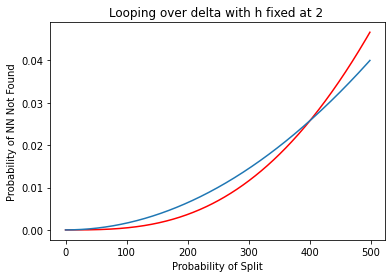

In [ ]:
plot(fs, color = 'r')
plt.title('Looping over delta with h fixed at 2 ')
plt.xlabel('Probability of Split')
plt.ylabel('Probability of NN Not Found')
plot(fm)

In [ ]:
d = 0.03
def first_method(d):
  out = []
  for h in range(1,500,1):
    a=(1-(1-d)**h-h*d*(1-d)**(h-1))
    out.append(a)
  return out

def second_method(d):
  out = []
  for h in range(1,500,1):
    a=((1-(1-d)**h)**(h+1))
    out.append(a)
  return out

In [ ]:
fm = first_method(d)
fs = second_method(d)

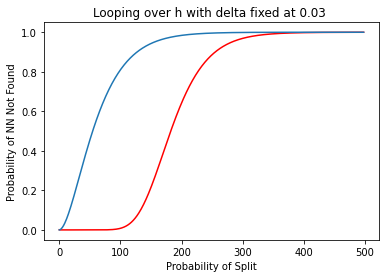

In [ ]:
plot(fs, color = 'r')
plt.title('Looping over h with delta fixed at 0.03 ')
plt.xlabel('Probability of Split')
plt.ylabel('Probability of NN Not Found')
plot(fm)



---


# Q2: Spectral graph theory (60pt) 
## Q2.1 $\sigma\rightarrow 0^+$ and $\sigma\rightarrow +\infty$ (*)

Recall that one construction of the weight matrix for a graph on data $\{\m{x}^{(i)}\}_{i=1}^N$ is to use the Gaussian
kernel $\m{W}_{ij}=\exp(-\|\m{x}^{(i)}-\m{x}^{(j)}\|_2^2/\sigma^2)$ for $i\ne j$ and $\m{W}_{ij}=0$ for $i=j$ for some choice of $\sigma>0$. 

- What happens to the resulting Laplacian matrix $L$ as $\sigma\rightarrow 0^+$? What are eigenvalues for the Laplacian matrix $L$?

- What about $\sigma\rightarrow \infty$? What are eigenvalues for the Laplacian matrix $L$ now?

# Your answer: 
As $\delta$ approaches $0^+$, the weights go to zero because the limit as k approaches 0 for $e^k$ is zero, Therefore the entire matrix we are left with is the zero matrix. So the eigenvalues are zero, and the neighborhood graph is not connected at all.

The opposite happens as $\delta$ approaches $∞^+$. The weights approach 1 and the graph is then fully connected such that the row sum of L becomes zero for every row. As for the eigenvalues, the first one will be zero while the second will be the size of the row or |V| also interpreted as N with a multiplicity of N-1.



---


## Q2.2 Ncut (***)
Let $\m{L} = \m{D} −\m{W}$ be the unnormalized graph Laplacian associated to a graph $G=(V, E, \m{W})$ on points $\{\m{x}^{(i)}\}_{i=1}^N$ with symmetric weight matrix $\m{W}$ and diagonal degree matrix  $D$. Let $\{C, \bar C\}$ be any partition of $\{\m{x}^{(i)}\}_{i=1}^N$ and let 
\begin{align}
f_i^C = \begin{cases} -\sqrt{\frac{\text{Vol}(\bar{C})}{\text{Vol}(C)}} & \m{x}^{(i)}\in C \\ \sqrt{\frac{\text{Vol}(C)}{\text{Vol}(\bar C)}} & \m{x}^{(i)}\in \bar C\end{cases}
\end{align}


- Prove that $\langle D \m{f}^c, \mb{1}\rangle = 0 $, where $\mb{1}$  is the vector of all 1’s.

- Prove that $(\m{f}^C)^\top\m{D}\m{f}^C=\text{vol}(V)$.

- Prove that $(\m{f}^C)^\top\m{L}\m{f}^C=\text{vol}(V)\text{Ncut}(C, \bar C)$.

# Your answer:
Let $x = f^c$ then,
$\sum_{i}x_id_i = \sqrt{\frac{vol(C)} {vol(\bar{C})}} \sum_{i \in \bar C}d_i - \sqrt{\frac{vol(\bar{C})}{vol(C)}} \sum_{i \in C}d_i$

we then have,

$ 
\sqrt{\frac{vol(C)} {vol(\bar{C})}} vol(\bar{C}) - \sqrt{\frac{vol(\bar{C})}{vol(C)}} vol(\bar{C}) 
$

which then decomposes to 1-1 and finally we get $\langle D \m{f}^c, \mb{1}\rangle = 0. $

We are able to convert each sum to its respective volume representation because that is by definition how each volume is obtained for $C$ and $\bar{C}$.

Again, let $x = f^c$

Setting the negative volume of the piecewise function second, allows to convert it to an easy to read addition problm and more intuitive to read. 

$x^TDx = \sum_id_ix_i^2 = \sum_{i\in \bar{C}}d_i(\sqrt{\frac{vol(C)}{vol(\bar{C})}})^2  + \sum_{i\in{C}}d_i(\sqrt{\frac{vol(\bar{C})}{vol(C)}})^2   $

We again use the definition of each individual volume of v to replace the summations respectively.

$
vol(\bar{C})\frac{vol(C)}{vol(\bar{C}} + vol(C)\frac{vol(\bar{C})}{vol(C)}
$

Finally we use the defintion of vol(V) to combine the two volumes and finishing the proof.

$
=vol(C) + vol(\bar{C}) = vol(V)$ by definition 

For the final part, we let $x = f^c$ once more

Given: $x^TLx= \frac{1}{2}\sum_{i,j}w_{ij}(x_i-x_j)^2   $ 

We now aim to slightly expand out our formula reveal the two scenarios. We arrive at replacing the $x_i$ and $x_j$ with the respective values from the piecewise function.

$= \sum_{i\in{\bar{C}}j\in{C}}w_{i,j}(\sqrt{\frac{vol(C)}{vol(\bar
{C})}} + \sqrt{\frac{vol(\bar{C})}{vol(C)}} )^2 $

By definition of a cut we get,

$ =cut(\bar{C},C) \sqrt{\frac{vol(C)}{vol(\bar{C})}} + \sqrt{\frac{vol(\bar{C})}{vol(C)}} )^2  $

We further expand, 

$ =\sqrt{\frac{vol(C)}{vol(\bar{C})}} + \sqrt{\frac{vol(\bar{C})}{vol(C)}} )cut(\bar{C},C) \sqrt{\frac{vol(C)}{vol(\bar{C})}} + \sqrt{\frac{vol(\bar{C})}{vol(C)}} ) $

Finally, by definition of vol(V) and ncut, we obtain the following solution.

$vol(V)ncut(\bar{C},C)$



---


## Q2.3 Random walk graph Laplacian (*)
Suppose we build a fully connected graph in which each node is connected to every other node, i.e, $\m{W}_{ij}=1$, $i\ne j$ and $\m{W}_{ii}=0$. 


- What is the formula for the random walk graph Laplacian $\m{L}^{\text{rw}}$ in this case?

- What can be said about the eigenvalues $\lambda_i$ for $\m{L}^{\text{rw}}$?

- What would happen if the number of clusters was estimated with the eigengap ($\hat K=\arg\max_k (\lambda_{k+1}-\lambda_k)$)? Explain if this estimate makes sense or not.

# Your answer:
The newly constructed is as follows; such that N represents the size of each row vector |V|. We arrive at this conclusion because each row sums to zero. 


$
{L}^{\text{rw}}_{ij}  = 
\begin{cases}
1 &\text{if $i=j$ } \\ 
-\frac{1}{N} & \text{if $i\ne j$ } \\
\end{cases}
$

It follows from this that the eigenvalues would be similar to the conclusion reached in 2.1; in that the first eigenvalue would be 0 and the second would equal size |V| or N for short.



This estimate is saying to take the K that maximizes the argument. In this case, K would be 1 because we only have 2 eigenvalues. From this we make one cluster which in the case of all the weights being 1 and connected, would actually be correct.





---


# Q3: Hyperspectral Remote Sensing Scenes (30pt) (**)
We are using the data collected by the 224-band AVIRIS sensor over Salinas Valley, California, and is characterized by high spatial resolution (3.7-meter pixels). The link of the data is: http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Salinas_scene. Here we use an small subscene of Salinas image, denoted Salinas-A. It comprises $83\times 86$ pixels and 204 bands, i.e., each pixel has 204 bands information. So the dimensional of the data $D=204$ and the number of the dataset is $N=83\times 86=7138$. 

In [ ]:
from scipy.io import loadmat

!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/SalinasA_corrected.mat?raw=true -O SalinasA_corrected.mat
data = loadmat('SalinasA_corrected.mat')
image = data['salinasA_corrected']

--2022-04-05 14:12:03--  https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/SalinasA_corrected.mat?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW2/SalinasA_corrected.mat [following]
--2022-04-05 14:12:03--  https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW2/SalinasA_corrected.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW2/SalinasA_corrected.mat [following]
--2022-04-05 14:12:04--  https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW2/SalinasA_corrected.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 1

In [ ]:
print(image.shape)

(83, 86, 204)


We are going to perform the clustering task on this dataset `image`.In this case, we also the ground truth to compare with.

In [ ]:
# Groundtruth classes for the Salinas-A scene and their respective samples
# There are six classes. 
!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/SalinasA_gt.csv?raw=true -O SalinasA_gt.csv
df = pd.read_csv('SalinasA_gt.csv')
label =df.to_numpy()

--2022-04-05 14:12:04--  https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/SalinasA_gt.csv?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW2/SalinasA_gt.csv [following]
--2022-04-05 14:12:04--  https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW2/SalinasA_gt.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW2/SalinasA_gt.csv [following]
--2022-04-05 14:12:05--  https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW2/SalinasA_gt.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to r

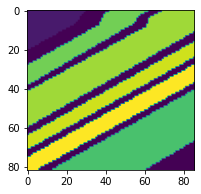

In [ ]:
figure(figsize=(3,3))
imshow(label)

## Your task
- Step 1: Reshape the image data into the $X$ matrix with the shape $N\times D= 7138\times 204$. Build the similarity graph with the **symmetric KNN** and find the weight matrix $\m{W}$.

- Step 2:  Run spectral clustering on this data, using a sparse Laplacian with different numbers of nearest neighbors and $K = 6$ clusters. How do the results compare to the ground truth data?

- Step 3: Plot the first 10 eigenvalues of the data for different choices of $\sigma$. What does the eigengap estimate as
the number of clusters for these choices of $\sigma$?

- Step 4: Compare the projections onto the first three principle components with the first three Laplacian eigenvectors by plotting both sets in different figures. How do the representations differ
qualitatively?

In [ ]:
# Your code starts here
X = np.copy(image)  # Copy orginal dataset

In [ ]:
from numpy import zeros
newx = zeros([7138,204]) # not robust, only works for this specific data set
for i in range(204):  # reshape dataset
  newx[:,i] = np.reshape(X[:,:,i],(7138))


In [ ]:
X = newx  # rename the output back to the original

In [ ]:

def cal_pairwise_dist(X):
  sum_x = sum(np.power(X,2),1)
  dist_matrix_sq = (-2 * dot(X, X.T)+ sum_x).T + sum_x
  return np.power(dist_matrix_sq,0.5)

def similarity(dist,t):
  return exp(- (dist*dist)/t) 

def symknn(X): 
  k = 9
  N = X.shape[1]
  graph = zeros([N,N]) + np.inf
  for i in range(N):
    dist=X[i,:]
    dist_sort_index = argsort(dist)
    labels    = dist_sort_index[0:k+1]
    graph[i,labels]=dist[labels]
    graph[labels,i]=dist[labels]
  return graph


def construct_w(scnd,t):
  N = scnd.shape[0]
  W = zeros([N,N])
  for i in range(scnd.shape[0]):
    W[i] = similarity(scnd[i],t)
  return W






In [ ]:
t = 10000000000
frst = cal_pairwise_dist(X)
scnd = symknn(frst)
w = construct_w(scnd,t)

In [ ]:
N = scnd.shape[0]
W = zeros([N,N])

for i in range(scnd.shape[0]):
  W[i] = similarity(scnd[i],t)

In [ ]:
def mykmeans(X, K, max_iter=100):
  # step 0
  centroids = X.copy()
  random.shuffle(centroids)
  centroids = centroids[:K]
  
  distortion_list = []
  for i in range(max_iter):
    # step 1
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    distortion_list.append(sum(np.min(distances, axis=0)))
    closest   = argmin(distances, axis=0)
    centroids_old = centroids
    # step 2
    centroids = array([X[closest==k].mean(axis=0) for k in range(K)])
    # step 3
    if sum(centroids-centroids_old) == 0.:
      break

  return centroids, closest, distortion_list

In [ ]:
def spectral_clustering(dist_matrix, W ,t):

# step 1
  #opt_eps_jumps = 1.4
  #eps, W = optimum_epsilon(dist_matrix, opt_eps_jumps, t)
  #method['para']=eps

  N = dist_matrix.shape[1]
  D = diag(W.sum(axis=1))  
  L = D - W # unnormalized_laplacian

  # Plot the graph Laplacian as heat map.
  fig, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(L, ax=ax, cmap='viridis_r')
  ax.set(title='Graph Laplacian');
  
  d_half = diag(1/sqrt(D.diagonal()))
  Ls =  d_half @ ( L @ d_half ) # normalized_symmetrized_laplacian
  eigval, eigvec = eigh(Ls) 
  eigvec         = d_half @ (eigvec) 


  #Lr = eye(N)- (diag(1/D.diagonal())@W) # normalized_random_laplacian
  #eigval, eigvec = eig(Lr) # this is not stable when Lr is large. In large, use Lsys and use eigh
  order = argsort(eigval)  

  #Z = eigvec[:, order[1:d + 1]]

  
  #if K ==2 and d == 1:
  #  y = zeros(N)
  #  y[(Z>0).ravel()]=1
  #else:
  #  centroids, y, distortion_list = mykmeans(Z, K, max_iter=100)


  return eigvec[:,order], eigval[order]


In [ ]:
w

array([[1.        , 0.99999145, 0.99999301, ..., 0.        , 0.        ,
        0.        ],
       [0.99999145, 1.        , 0.99999251, ..., 0.        , 0.        ,
        0.        ],
       [0.99999301, 0.99999251, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.99999453,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.99999453, 1.        ,
        0.99999416],
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999416,
        1.        ]])

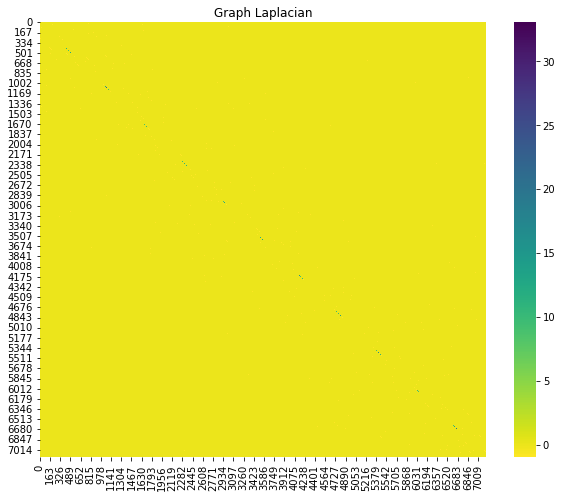

In [ ]:
evec, eval = spectral_clustering(frst, w ,t)

[Text(0.5, 1.0, 'First 10 Eigenvalues')]

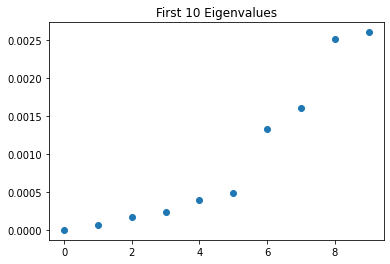

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(arange(10),eval[:10])
ax.set(title='First 10 Eigenvalues')

# Your answer:

In [ ]:
X.shape
X_mean = np.mean(X, axis=0)
Xp = X - X_mean
Xp = Xp.T

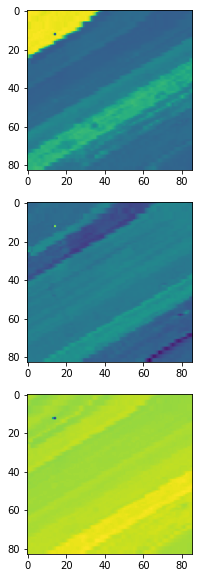

In [ ]:
u, s, vh =svd(Xp, full_matrices=False)
PC = vh[:3,:]
PC = PC.T
PC_image = reshape(PC, [83, 86,3])
fig, axs = plt.subplots(3,figsize=(10,10))
axs = axs.ravel()
for i in range(3):
    axs[i].imshow(PC_image[:,:,i]);

In [ ]:
EV = evec[:,:3]

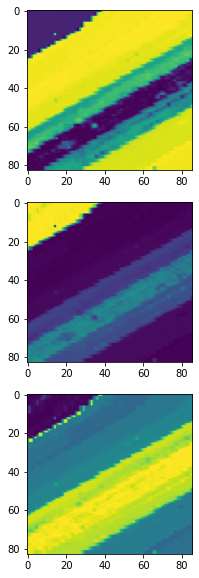

In [ ]:
EV_image = reshape(EV, [83, 86,3])
fig, axs = plt.subplots(3,figsize=(10,10))
axs = axs.ravel()
for i in range(3):
    axs[i].imshow(EV_image[:,:,i]);

It appears the Laplacian Eigenvectors outperform the PCA eigenvectors drastically. 



---


# Optional question (***)
 If you can handle the previous dataset well, you can uncomment the following code. Now your dataset $N$ is more than $10^5$ and all brute force methods will fail here. Also the number of cluster is also much higher (about 16 clusters). Try it out. Having fun! 

In [ ]:
#!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW2/Salinas_corrected.mat?raw=true -O Salinas_corrected.mat
# data = loadmat('Salinas_corrected.mat')
# image = data['salinas_corrected']

